In [1]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from torch import nn
import numpy as np
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from helper_functions import plot_decision_boundary


In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'


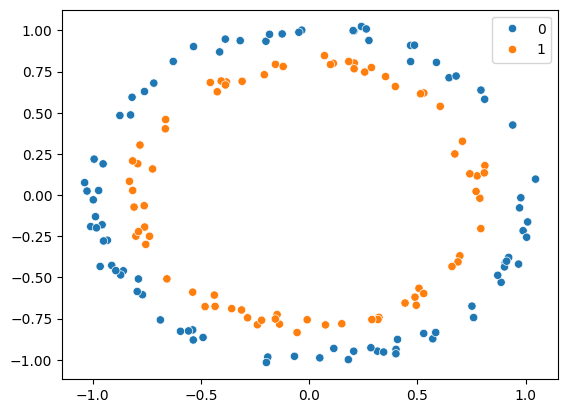

In [3]:
data = make_circles(n_samples=800, noise=0.03, random_state=23)

X, y = data

X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.2, random_state=23
)

#plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.rainbow, s=10)
#plt.show()
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette='tab10')


X_train = torch.tensor(X_train).to(device).type(torch.float)
y_train = torch.tensor(y_train).to(device).type(torch.float)
X_test = torch.tensor(X_test).to(device).type(torch.float)
y_test = torch.tensor(y_test).to(device).type(torch.float)


In [4]:
# create custom class
class CircleClassifierV0(nn.Module):
	def __init__(self) -> None:
		super().__init__()

		# create linear layers
		self.layer1 = nn.Linear(in_features=2, out_features=5)
		self.layer2 = nn.Linear(in_features=5, out_features=1)


	def forward(self, X: torch.Tensor) -> torch.Tensor:
		return self.layer2(self.layer1(X))


#model1 = CircleClassifierV0().to(device)


In [5]:
def accuracy(y_pred, y_test) -> float:
	y_pred = y_pred.to(device)
	y_test = y_test.to(device)
	return sum(y_pred == y_test) / len(y_test)


In [6]:
# use Sequential, easy peasy
model2 = nn.Sequential(
	nn.Linear(in_features=2, out_features=5),
	nn.ReLU(),
	nn.Linear(in_features=5, out_features=1),
).to(device)

model2


Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=1, bias=True)
)

In [7]:
# pick loss and optimizer
loss_fn = nn.BCEWithLogitsLoss() # has sigmoid built-in

optimizer = torch.optim.SGD(params=model2.parameters(), lr=5e-2)


In [8]:
torch.manual_seed(23)
torch.cuda.manual_seed(23)

epochs = 2000

for epoch in range(1, epochs+1):
	model2.train()


	y_logits = model2(X_train).squeeze()
	y_pred = torch.round(torch.sigmoid(y_logits))

	# for a loss function of type BCELoss, we should pass in prediction probablity
	# loss = loss_fn(y_pred, y_train)

	# for a loss function of type BCEWithLogitsLoss, we should pass in logits
	loss = loss_fn(y_logits, y_train)

	optimizer.zero_grad()

	loss.backward()

	optimizer.step()

	model2.eval()
	with torch.inference_mode():
		y_logits_test = model2(X_test).squeeze()
		y_pred_test = torch.round(torch.sigmoid(y_logits_test))
		loss_test = loss_fn(y_logits_test, y_test)

	if epoch % 10 == 0:
		acc: float = accuracy(y_pred_test, y_test)*100
		print(f'{epoch = :0>4} ->\t{loss = :.4f}\t{loss_test = :.4f}\ttest accuracy = {acc:.2f}%')
	if epoch % 1000 == 0:
		pass#plot_decision_boundary(model=model2, X=X_train, y=y_train)


epoch = 0010 ->	loss = 0.6911	loss_test = 0.6872	test accuracy = 52.50%
epoch = 0020 ->	loss = 0.6907	loss_test = 0.6874	test accuracy = 51.25%
epoch = 0030 ->	loss = 0.6904	loss_test = 0.6875	test accuracy = 52.50%
epoch = 0040 ->	loss = 0.6901	loss_test = 0.6877	test accuracy = 51.88%
epoch = 0050 ->	loss = 0.6898	loss_test = 0.6878	test accuracy = 51.88%
epoch = 0060 ->	loss = 0.6896	loss_test = 0.6878	test accuracy = 51.88%
epoch = 0070 ->	loss = 0.6894	loss_test = 0.6878	test accuracy = 52.50%
epoch = 0080 ->	loss = 0.6892	loss_test = 0.6878	test accuracy = 51.88%
epoch = 0090 ->	loss = 0.6890	loss_test = 0.6878	test accuracy = 50.63%
epoch = 0100 ->	loss = 0.6889	loss_test = 0.6878	test accuracy = 50.63%
epoch = 0110 ->	loss = 0.6887	loss_test = 0.6877	test accuracy = 50.63%
epoch = 0120 ->	loss = 0.6885	loss_test = 0.6877	test accuracy = 50.63%
epoch = 0130 ->	loss = 0.6884	loss_test = 0.6876	test accuracy = 51.25%
epoch = 0140 ->	loss = 0.6882	loss_test = 0.6875	test accuracy =

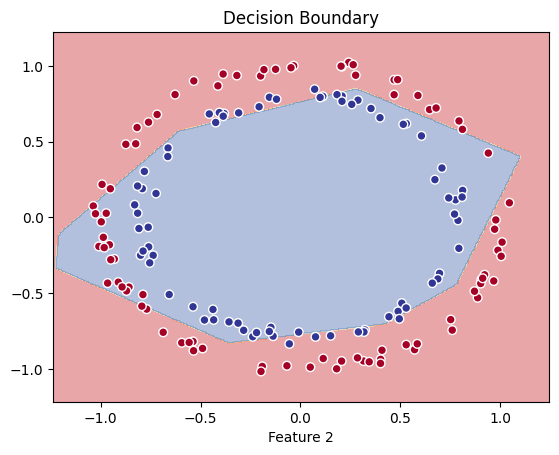

In [9]:
plot_decision_boundary(model2, X_test, y_test, num_points=350)



In [10]:
# this code wont quite work because there is no non-linearity to the network!


In [11]:
#import requests

#helper_functions = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')

#with open('helper_functions.py', 'wb') as file:
#	file.write(helper_functions.content)
